In [1]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("cumulative.csv")
df = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


# Create a Train Test Split

Use `koi_disposition` for the y values

In [3]:
from sklearn.model_selection import train_test_split

y = df["koi_disposition"]
X = df.drop("koi_disposition", axis=1)
#X = voice.drop("label", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [4]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6274,0,0,0,0,492.252990,0.011050,-0.011050,520.860000,0.01800,-0.01800,...,-152.0,4.478,0.055,-0.283,0.936,0.383,-0.089,292.13519,38.926491,13.465
3541,0,0,0,0,49.567408,0.000187,-0.000187,169.542270,0.00322,-0.00322,...,-111.0,4.474,0.059,-0.110,0.927,0.122,-0.066,290.67313,38.691010,13.597
8659,1,0,0,0,452.100930,0.054070,-0.054070,460.488400,0.05070,-0.05070,...,-214.0,4.456,0.066,-0.281,0.956,0.370,-0.103,292.10245,37.566910,15.107
4851,0,1,0,0,18.645329,0.000002,-0.000002,147.207512,0.00007,-0.00007,...,-175.0,4.554,0.038,-0.200,0.845,0.251,-0.079,287.63705,42.530819,15.511
1387,0,0,0,0,5.184990,0.000012,-0.000012,131.881400,0.00185,-0.00185,...,-131.0,4.680,0.059,-0.027,0.560,0.045,-0.056,295.90656,45.809120,14.744


# Pre-processing

Scale the data using the MinMaxScaler

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaler = X_scaler.transform(X_train)

X_test_scaler = X_scaler.transform(X_test)
#X_scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

# Train the Support Vector Machine

In [6]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [7]:
model.fit(X_train_scaler, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [9]:
print(f"Training Data Score: {model.score(X_train_scaler, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaler, y_test)}")

Training Data Score: 0.8584934431229033
Testing Data Score: 0.8522415370539799


# Hyperparameter Tuning

Use `GridSearchCV` to tune the `C` and `gamma` parameters

In [12]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1)
grid

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [13]:
# Train the model with GridSearch
grid.fit(X_train_scaler, y_train)

C:\Users\rz0001\AppData\Local\Continuum\anaconda3\envs\Pythondata\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    8.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [14]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'gamma': 0.0001}
0.8732845379688929


In [16]:
predictions = grid.predict(X_test_scaler)
predictions

array(['FALSE POSITIVE', 'FALSE POSITIVE', 'CONFIRMED', ...,
       'FALSE POSITIVE', 'CANDIDATE', 'FALSE POSITIVE'], dtype=object)

### Random Forest 

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf = RandomForestClassifier(n_estimators=200)

In [19]:
rf = rf.fit(X_train_scaler, y_train)

In [21]:
rf.score(X_test_scaler, y_test)

0.8879231473010064

In [22]:
importances = rf.feature_importances_
importances

array([0.10395348, 0.07615171, 0.10894166, 0.03439495, 0.02104037,
       0.01606072, 0.01796029, 0.01241555, 0.02673741, 0.02638347,
       0.02050432, 0.01122593, 0.0095782 , 0.02351021, 0.02751297,
       0.03309916, 0.02243118, 0.01384483, 0.01401961, 0.05263473,
       0.02777741, 0.02895671, 0.01461274, 0.0132926 , 0.01706577,
       0.0118407 , 0.05877028, 0.00320785, 0.00918641, 0.02694429,
       0.02685182, 0.00908221, 0.0088455 , 0.0098434 , 0.00908561,
       0.01139496, 0.00844734, 0.01202187, 0.0101434 , 0.01022839])

### K Nearest Neighbors

In [23]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [25]:
X_train_scaler.shape
y_train.shape


(6558,)

In [26]:
train_scores = []
test_scores = []

for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaler, y_train)
    train_score = knn.score(X_train_scaler, y_train)
    test_score = knn.score(X_test_scaler, y_test)
    train_scores.append(train_score)    
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")   
 

k: 1, Train/Test Score: 1.000/0.801
k: 3, Train/Test Score: 0.901/0.817
k: 5, Train/Test Score: 0.874/0.820
k: 7, Train/Test Score: 0.866/0.825
k: 9, Train/Test Score: 0.858/0.828
k: 11, Train/Test Score: 0.851/0.829
k: 13, Train/Test Score: 0.846/0.823
k: 15, Train/Test Score: 0.848/0.823
k: 17, Train/Test Score: 0.845/0.824
k: 19, Train/Test Score: 0.842/0.825


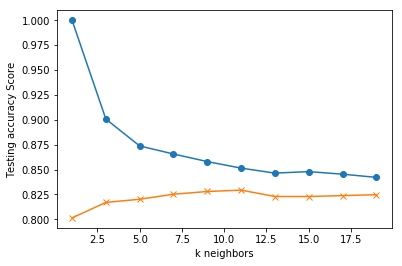

In [27]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

### Deep Learning 

In [28]:
# Step 1: Label-encode data set
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [30]:
# Step 2: Convert encoded labels to one-hot-encoding
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [42]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=40))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [43]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               4100      
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 303       
Total params: 14,503
Trainable params: 14,503
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.fit(
    X_train_scaler,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=2
)

Epoch 1/60
6558/6558 - 0s - loss: 0.5255 - acc: 0.7420
Epoch 2/60
6558/6558 - 0s - loss: 0.3618 - acc: 0.8153
Epoch 3/60
6558/6558 - 0s - loss: 0.3488 - acc: 0.8321
Epoch 4/60
6558/6558 - 0s - loss: 0.3361 - acc: 0.8387
Epoch 5/60
6558/6558 - 0s - loss: 0.3254 - acc: 0.8478
Epoch 6/60
6558/6558 - 0s - loss: 0.3137 - acc: 0.8524
Epoch 7/60
6558/6558 - 0s - loss: 0.3073 - acc: 0.8593
Epoch 8/60
6558/6558 - 0s - loss: 0.3052 - acc: 0.8635
Epoch 9/60
6558/6558 - 0s - loss: 0.3020 - acc: 0.8631
Epoch 10/60
6558/6558 - 0s - loss: 0.2988 - acc: 0.8669
Epoch 11/60
6558/6558 - 0s - loss: 0.2928 - acc: 0.8669
Epoch 12/60
6558/6558 - 0s - loss: 0.2968 - acc: 0.8661
Epoch 13/60
6558/6558 - 0s - loss: 0.2870 - acc: 0.8727
Epoch 14/60
6558/6558 - 0s - loss: 0.2878 - acc: 0.8724
Epoch 15/60
6558/6558 - 0s - loss: 0.2792 - acc: 0.8800
Epoch 16/60
6558/6558 - 0s - loss: 0.2816 - acc: 0.8772
Epoch 17/60
6558/6558 - 0s - loss: 0.2811 - acc: 0.8768
Epoch 18/60
6558/6558 - 0s - loss: 0.2746 - acc: 0.8800
E

In [46]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaler, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

2186/2186 - 0s - loss: 0.2669 - acc: 0.8879
Normal Neural Network - Loss: 0.2669003219203129, Accuracy: 0.8879231214523315


# Final Conclusion

#### 1. Random Forest - 88.79%
#### 2. Deep Learning - 88.79%
#### 3. SVM - 87.33%
#### 4. K Nearest Neighbor - 82.80%